# A simple Deep Neural Network using Keras

In this notebook, we are going to explore a deep neural network to classify MNIST dataset.
We have picked Keras, which is high level wrapper over Theano/TensorFlow for this purpose.

We are using Theano backend for this particular exercise.
*note: TensorFlow is also supported (as an alternative to Theano), but we stick with Theano to keep it simple. The main difference is that you'll need to reshape the data slightly differently before feeding it to your network.



### Step 1: Import the packages

In [1]:
from __future__ import print_function
import keras

# For MNIST dataset
from keras.datasets import mnist

# Keras model module
from keras.models import Sequential

# Keras core layers
from keras.layers import Dense, Dropout, Flatten

# Keras CNN Layers
from keras.layers import Conv2D, MaxPooling2D

from keras import backend as K
from keras.utils import np_utils

# %matplotlib inline
import matplotlib.pyplot as plt

Using Theano backend.


### Step 2: Load image data from MNIST.

MNIST is a great dataset for getting started with deep learning and computer vision. It's a big enough challenge to warrant neural networks, but it's manageable on a single computer

In [2]:
# Load MNSIT data
from keras.datasets import mnist
 
# Load pre-shuffled MNIST data into train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

We can look at the shape of the dataset:

In [3]:
print(x_train.shape)
# (60000, 28, 28)
num_classes = 10

(60000, 28, 28)


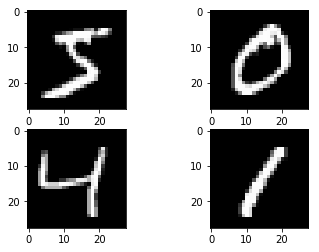

In [4]:
# Plot a few example images
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

### Step 3: Preprocess input data for Keras.

When using the Theano backend, you must explicitly declare a dimension for the depth of the input image. For example, a full-color image with all 3 RGB channels will have a depth of 3.

Our MNIST images only have a depth of 1, but we must explicitly declare that.

In other words, we want to transform our dataset to (n, depth, width, height).

Here's how we can do that easily:

In [5]:
# input image dimensions
img_rows, img_cols = 28, 28

# Reshape input data

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [6]:
# To confirm, we can print X_train's dimensions again:

print (x_train.shape)

(60000, 28, 28, 1)


The final preprocessing step for the input data is to convert our data type to float32 and normalize our data values to the range [0, 1].

In [7]:
# Convert data types and normalize values

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Step 4: Preprocess class labels for Keras

Next, let's take a look at the shape of our class label data:

In [8]:
print(y_train.shape)

(60000,)


That may be problematic. We should have 10 different classes, one for each digit, but it looks like we only have a 1-dimensional array. Let's take a look at the labels for the first 10 training samples:

In [9]:
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


In [10]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [11]:
print(y_train.shape)


(60000, 10)


### Step 5:  Define model architecture

We are going to use a simple architecture. There are multiple options for an architecture. 

In [12]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [13]:
# Check model output shape

print(model.output_shape)

(None, 10)


### Step 6: Compile the model

We just need to compile the model and we'll be ready to train it. When we compile the model, we declare the loss function and the optimizer (SGD, Adam, etc.).

In [14]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

### Step 7: Fit model on training data

To fit the model, all we have to do is declare the batch size and number of epochs to train for, then pass in our training data.

In [15]:
batch_size = 128
epochs = 2


In [33]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
          verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 325s - loss: 0.3338 - acc: 0.8988 - val_loss: 0.0827 - val_acc: 0.9736

### Step 8: Evaluate model on test data


In [34]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0827476256587
Test accuracy: 0.9736
